### Group:15
 teamate Name:
      1.Nabin Kumar Sah
      2.Vivek Srikar Reddy
      3. Karthik Ullas

**Deep Learning Approach for skin cancer detection using LIME and SHAP**

In [1]:
!pip install kaggle


In [2]:
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download kmader/skin-cancer-mnist-ham10000/

100% 5.20G/5.20G [00:43<00:00, 219MB/s]
100% 5.20G/5.20G [00:43<00:00, 129MB/s]


In [4]:
!unzip skin-cancer-mnist-ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [5]:
import pandas as pd

data = pd.read_csv('/content/hmnist_8_8_RGB.csv')

data.head(10)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,199,156,188,210,165,198,216,176,203,215,...,214,167,191,199,157,175,184,143,167,2
1,115,87,115,180,133,158,200,153,187,215,...,207,167,188,177,128,138,74,51,60,2
2,203,146,164,209,144,153,217,160,181,215,...,211,160,175,199,152,172,177,138,158,2
3,135,96,110,198,141,156,208,148,158,210,...,179,141,157,153,122,138,58,39,46,2
4,204,156,187,232,185,216,236,196,220,217,...,236,189,213,233,182,209,207,175,188,2
5,26,13,18,175,147,152,247,220,231,248,...,207,151,184,101,69,84,2,0,0,2
6,201,156,149,204,157,150,206,155,151,209,...,217,168,172,214,166,169,211,162,166,2
7,174,129,118,189,139,136,201,147,140,207,...,206,160,161,197,151,146,133,97,91,2
8,175,122,127,199,138,152,214,159,181,219,...,202,140,155,195,134,144,121,80,83,2
9,220,163,175,216,152,169,230,172,187,232,...,234,180,198,227,167,181,218,146,155,2


In [6]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fcfd8963336d3e3b8dde14afc18432fc33c13b48974080d54d70738f7bd5ca6d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.7 MB/s eta 0:00:00


In [7]:
!pip install opencv-python
!pip install keras
!pip install tensorflow

In [8]:
import numpy as np
import seaborn as sns;sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import cv2
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:

import keras
from keras.models import Sequential

from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import preprocessing
from keras.utils import to_categorical

In [10]:
import warnings
warnings.simplefilter("ignore")

In [11]:
meta = pd.read_csv("/content/HAM10000_metadata.csv")

In [12]:
meta.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [13]:
meta['age'].fillna((meta['age'].mean()), inplace=True)

to find the count of each types of skin cancer present int he dataset

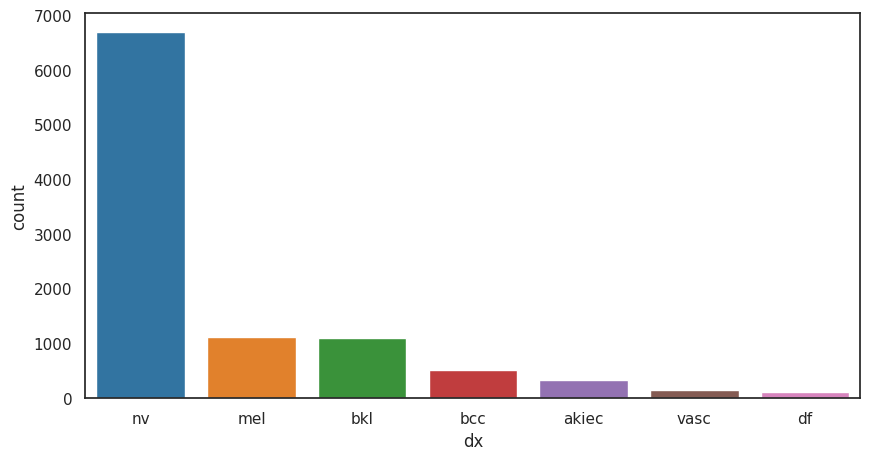

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
# # meta['dx'].value_counts().plot(kind='bar', ax=ax1)
sns.countplot(x = 'dx' , data = meta,order = meta['dx'].value_counts().index, palette="tab10")
plt.show()


In [15]:
print("HAM10000_images_part_1 folder have {} images.".format(len(os.listdir("/content/HAM10000_images_part_1"))))
print("HAM10000_images_part_2 folder have {} images.".format(len(os.listdir("/content/HAM10000_images_part_2"))))

HAM10000_images_part_1 folder have 5000 images.
HAM10000_images_part_2 folder have 5015 images.


In [16]:
nv_ls=[]
mel_ls=[]
bkl_ls=[]
bcc_ls=[]
akiec_ls=[]
vasc_ls=[]
df_ls=[]

for i in os.listdir("/content/HAM10000_images_part_1"):
  try:
    image = cv2.imread("/content/HAM10000_images_part_1/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    dx = meta.loc[meta["image_id"]==i.split(".")[0], "dx"].values[0]

    if dx == "nv":
      nv_ls.append(resize_img)
    elif dx == "mel":
      mel_ls.append(resize_img)
    elif dx == "bkl":
      bkl_ls.append(resize_img)
    elif dx == "bcc":
      bcc_ls.append(resize_img)
    elif dx == "akiec":
      akiec_ls.append(resize_img)
    elif dx == "vasc":
      vasc_ls.append(resize_img)
    elif dx == "df":
      df_ls.append(resize_img)

  except AttributeError:
    pass



for u in os.listdir("/content/HAM10000_images_part_2"):
  try:
    image = cv2.imread("/content/HAM10000_images_part_2/"+u)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    dx = meta.loc[meta["image_id"]==u.split(".")[0], "dx"].values[0]
    if dx == "nv":
      nv_ls.append(resize_img)
    elif dx == "mel":
      mel_ls.append(resize_img)
    elif dx == "bkl":
      bkl_ls.append(resize_img)
    elif dx == "bcc":
      bcc_ls.append(resize_img)
    elif dx == "akiec":
      akiec_ls.append(resize_img)
    elif dx == "vasc":
      vasc_ls.append(resize_img)
    elif dx == "df":
      df_ls.append(resize_img)
  except AttributeError:
    pass

In [17]:
meta["dx"].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

DATA Augmentation

In [18]:
bcc_up = random.choices(population=bcc_ls, k=1500)
akiec_up = random.choices(population=akiec_ls, k=1000)
vasc_up = random.choices(population=vasc_ls, k=1000)
df_up = random.choices(population=df_ls, k=1000)


nv_label = ["nv" for i in range(len(nv_ls))]
mel_label = ["mel" for i in range(len(mel_ls))]
bkl_label = ["bkl" for i in range(len(bkl_ls))]
bcc_label = ["bcc" for i in range(len(bcc_up))]
akiec_label = ["akiec" for i in range(len(akiec_up))]
vasc_label = ["vasc" for i in range(len(vasc_up))]
df_label = ["df" for i in range(len(df_up))]


or_data= nv_ls + mel_ls + bkl_ls+ bcc_up+ akiec_up+ vasc_up+ df_up
org_data = [np.array(i) for i in or_data]
or_labels= nv_label + mel_label + bkl_label + bcc_label + akiec_label + vasc_label+ df_label

org_data = np.array(org_data)
or_labels = np.array(or_labels)
# or_labels = [label[0] for label in or_labels.tolist()]

print('Before Augmentaion')
print('Data : {} | labels : {}'.format(org_data.shape , len(or_labels)))

Before Augmentaion
Data : (13417, 50, 50, 3) | labels : 13417


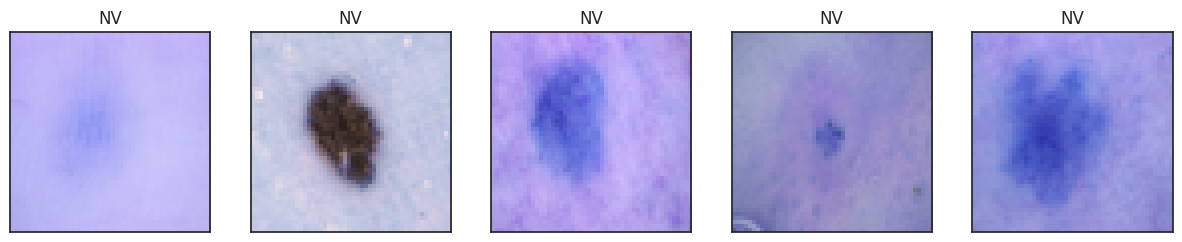

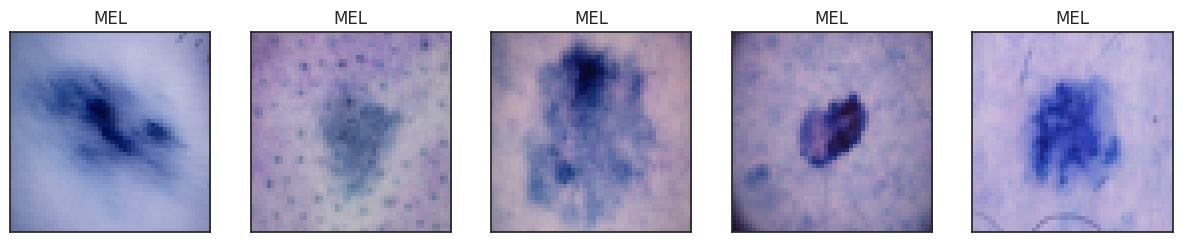

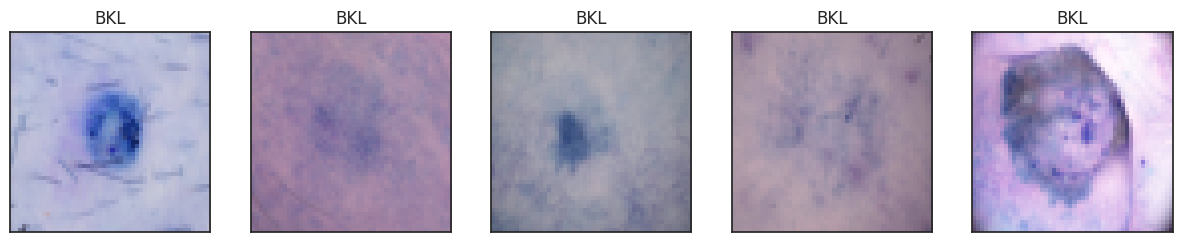

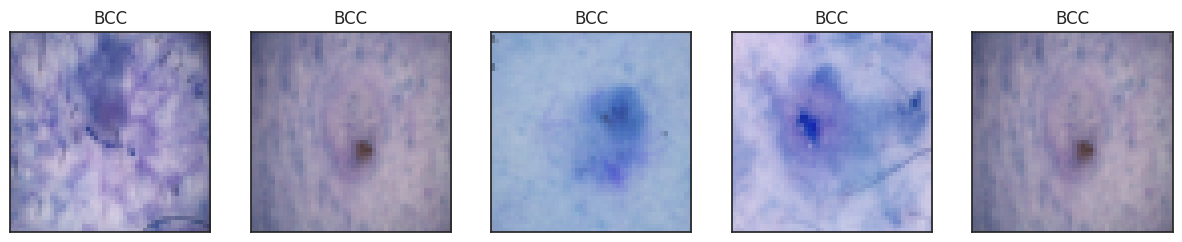

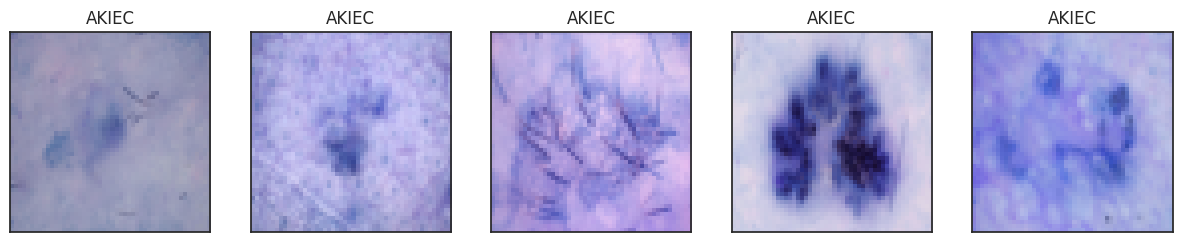

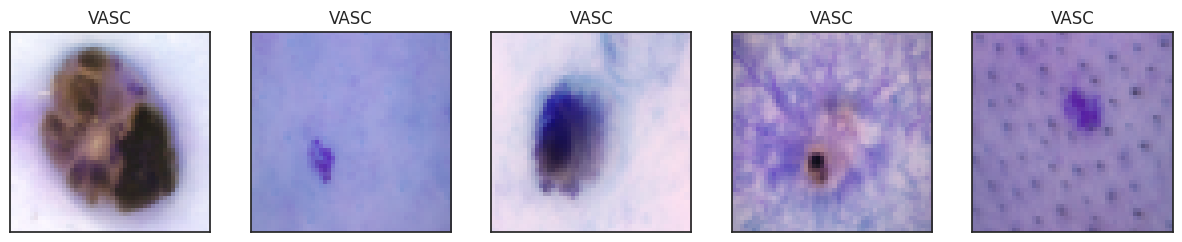

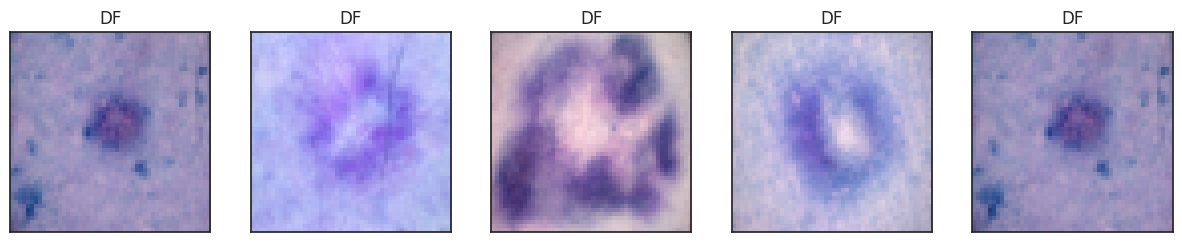

In [19]:
uni_labels=[]
for label in range(len(or_labels)):
  if or_labels[label] not in uni_labels:
    uni_labels.append(or_labels[label])
# print(uni_labels)


for uni in uni_labels:
  ls=[]
  for label in range(len(or_labels)):
    if or_labels[label] == uni:
      ls.append(label)
  ls =  random.choices(population=ls, k=5)

  plt.figure(figsize=(15,5))
  for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(org_data[ls[i-1]])
    plt.title(uni.upper())
    plt.xticks([])
    plt.yticks([])



In [20]:
data = []
labels = []

for index in range(len(or_data)):
  resize_img = or_data[index]
  dx = or_labels[index]
  rotated90 = resize_img.rotate(90)
  blur = cv2.blur(np.array(resize_img),(10,10))
  data.append(np.array(resize_img))
  data.append(np.array(rotated90))
  data.append(np.array(blur))
  labels.append(dx)
  labels.append(dx)
  labels.append(dx)

data = np.array(data)
labels = np.array(labels)
# labels = [label[0] for label in labels.tolist()]
print('After Augmentaion')
print('Data : {} | labels : {}'.format(data.shape , len(labels)))

After Augmentaion
Data : (40251, 50, 50, 3) | labels : 40251


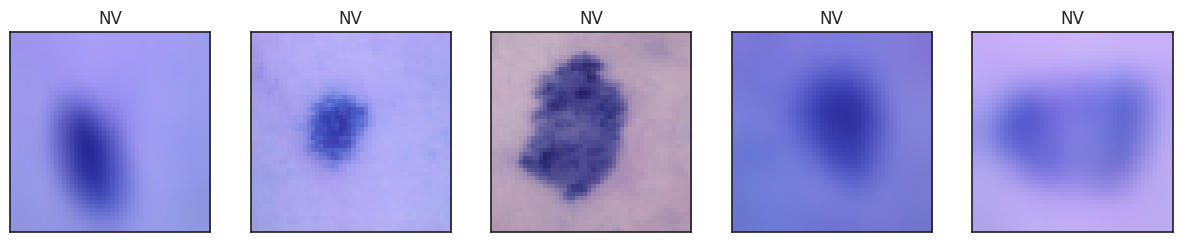

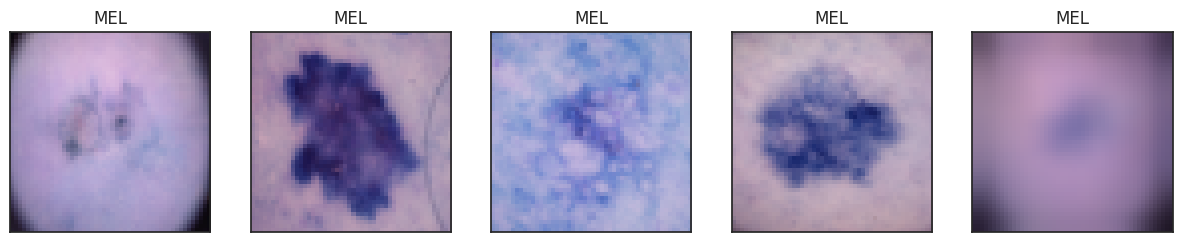

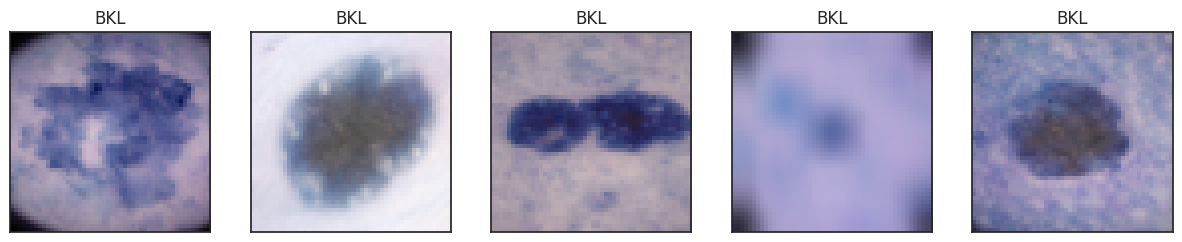

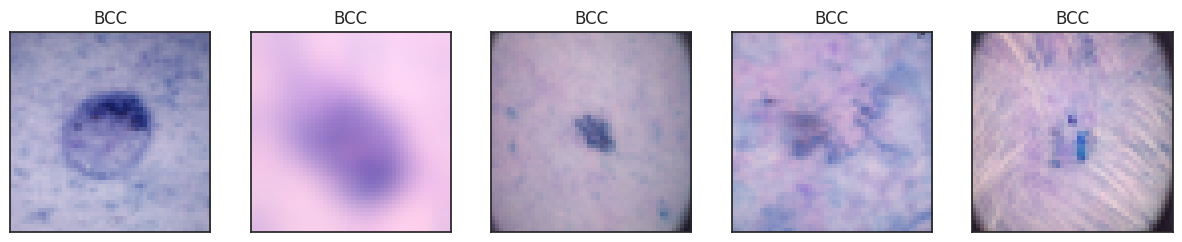

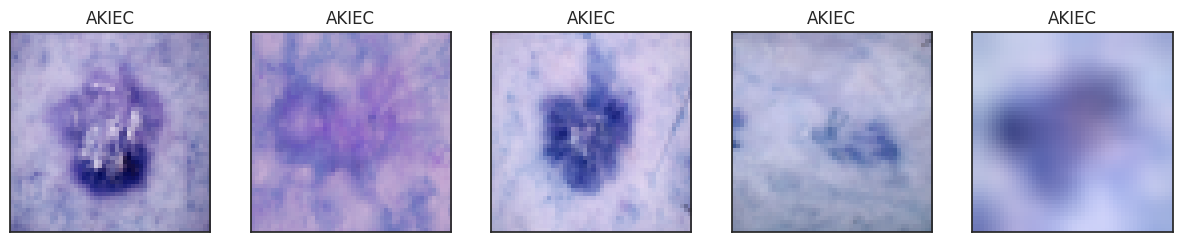

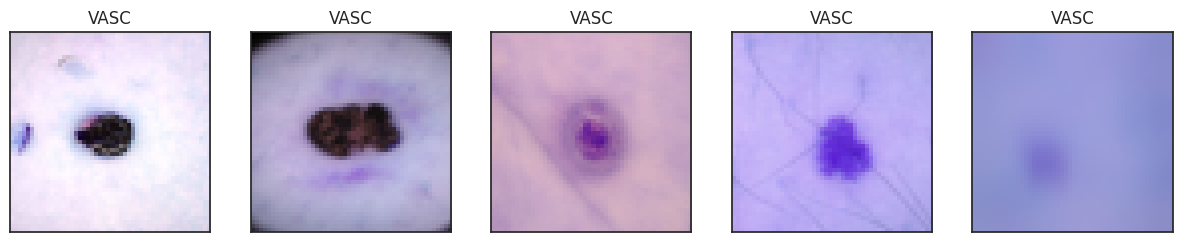

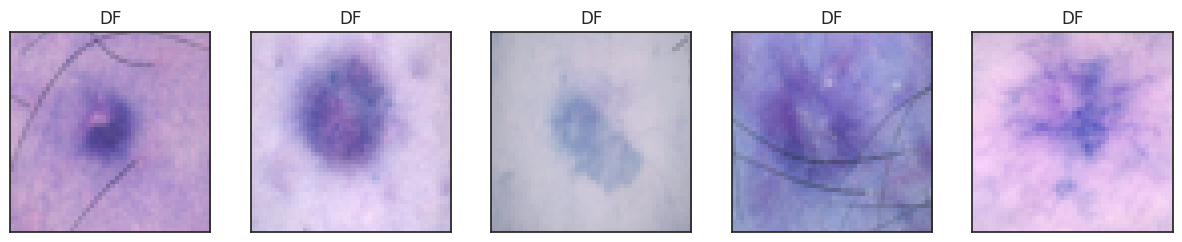

In [21]:
uni_labels=[]
for label in range(len(labels)):
  if labels[label] not in uni_labels:
    uni_labels.append(labels[label])
# print(uni_labels)


for uni in uni_labels:
  ls=[]
  for label in range(len(labels)):
    if labels[label] == uni:
      ls.append(label)
  ls =  random.choices(population=ls, k=5)

  plt.figure(figsize=(15,5))
  for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(data[ls[i-1]])
    plt.title(uni.upper())
    plt.xticks([])
    plt.yticks([])



In [22]:
labelEncoder = preprocessing.LabelEncoder()

mapping_dict={}
labels = labelEncoder.fit_transform(labels)
le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
le_name_mapping

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [23]:
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]
data = data.astype(np.float32)
labels = labels.astype(np.int32)

In [24]:
train_x , test_x , train_y , test_y = train_test_split(data , labels , test_size = 0.3, stratify = labels)

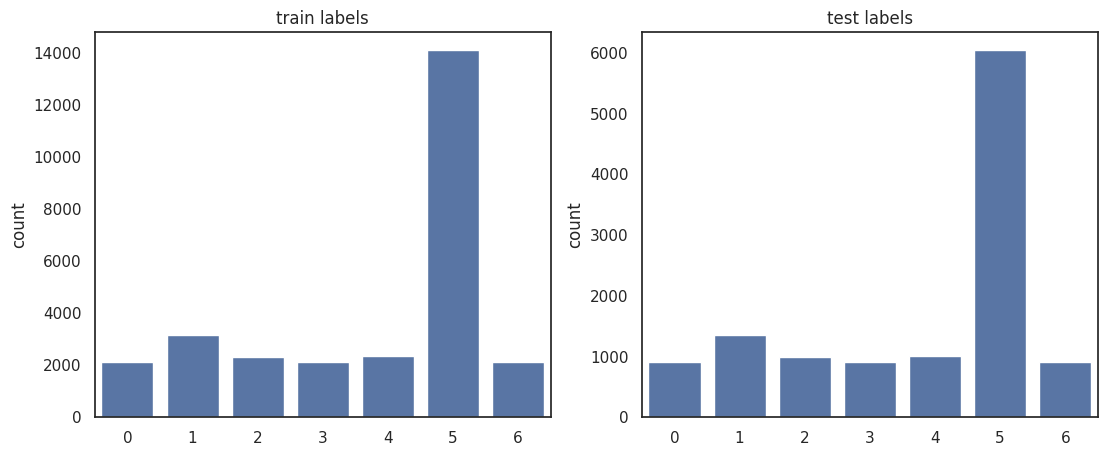

Y train shape (28175, 7)


In [25]:
plt.figure(1 , figsize = (20 ,5))
n = 0
for z , j in zip([train_y , test_y] , ['train labels', 'test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()


train_y=to_categorical(train_y,num_classes=7)
test_y=to_categorical(test_y,num_classes=7)

print("Y train shape",train_y.shape)

In [26]:
print('train data shape {} , test data shape {}'.format(train_x.shape, test_x.shape))

train data shape (28175, 50, 50, 3) , test data shape (12076, 50, 50, 3)


In [27]:
keras.backend.clear_session()

cnn = Sequential()
cnn.add(Convolution2D(32,(3,3),activation='relu',input_shape = (50, 50, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Convolution2D(32,(3,3),activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Convolution2D(64,(3,3),activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(7,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
%%time
early_stopping_monitor = EarlyStopping(patience = 3)
nn = cnn.fit(train_x, train_y, epochs = 100, validation_split = 0.2)

Epoch 1/100
705/705 [==============================] - 16s 10ms/step - loss: 1.1742 - accuracy: 0.5821 - val_loss: 0.9958 - val_accuracy: 0.6337
Epoch 2/100
705/705 [==============================] - 9s 12ms/step - loss: 0.9537 - accuracy: 0.6482 - val_loss: 1.2884 - val_accuracy: 0.5833
Epoch 3/100
705/705 [==============================] - 6s 8ms/step - loss: 0.8783 - accuracy: 0.6753 - val_loss: 2.1530 - val_accuracy: 0.5727
Epoch 4/100
705/705 [==============================] - 5s 7ms/step - loss: 0.8301 - accuracy: 0.6912 - val_loss: 0.7792 - val_accuracy: 0.7074
Epoch 5/100
705/705 [==============================] - 8s 11ms/step - loss: 0.7798 - accuracy: 0.7106 - val_loss: 0.6974 - val_accuracy: 0.7368
Epoch 6/100
705/705 [==============================] - 7s 9ms/step - loss: 0.7444 - accuracy: 0.7226 - val_loss: 0.8052 - val_accuracy: 0.6925
Epoch 7/100
705/705 [==============================] - 5s 8ms/step - loss: 0.7157 - accuracy: 0.7348 - val_loss: 0.9438 - val_accuracy: 0.

In [29]:
values  = nn.history
validation_loss = values['val_loss']
validation_acc = values['val_accuracy']
training_acc = values['accuracy']
training_loss = values['loss']
epochs = range(1, len(training_acc) + 1)

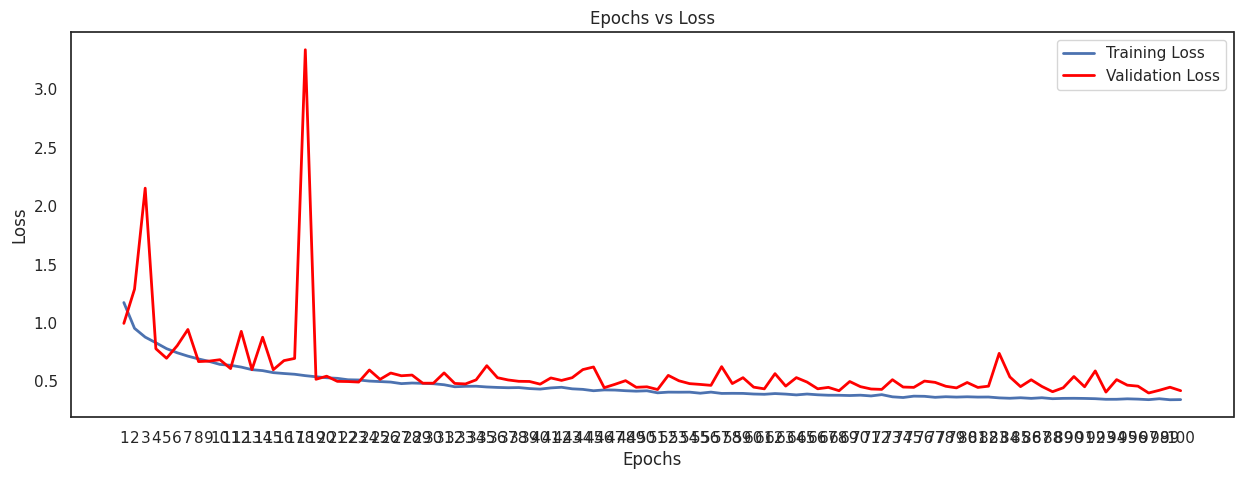

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.plot(epochs,training_loss,label = 'Training Loss',linewidth = 2)
plt.plot(epochs,validation_loss,label = 'Validation Loss',linewidth = 2, color = "red")
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.show()

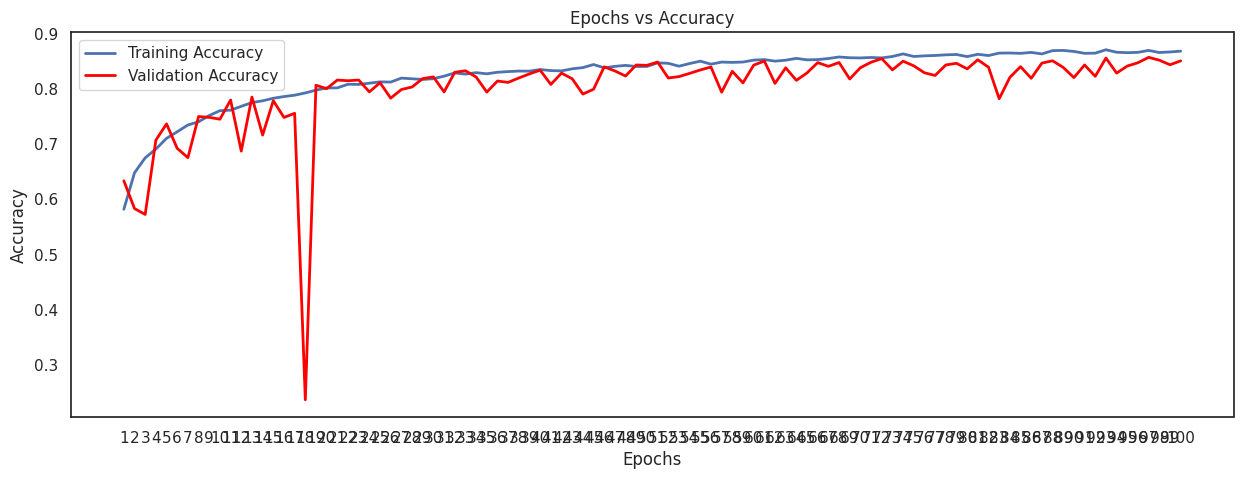

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.plot(epochs,training_acc,label = 'Training Accuracy',linewidth =2)
plt.plot(epochs,validation_acc,label = 'Validation Accuracy', linewidth =2, color= "red")
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

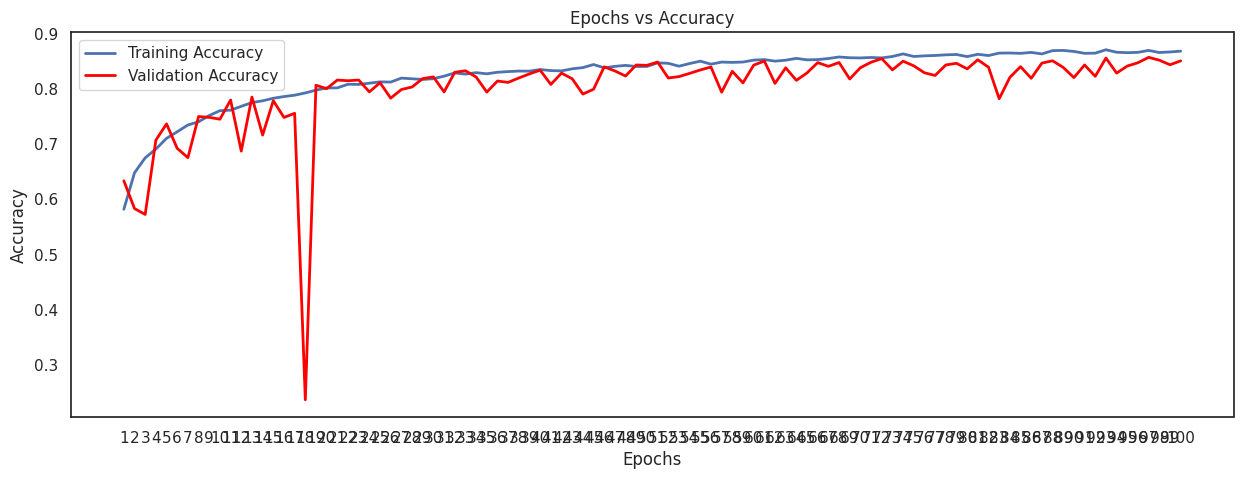

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.plot(epochs,training_acc,label = 'Training Accuracy',linewidth =2)
plt.plot(epochs,validation_acc,label = 'Validation Accuracy', linewidth =2, color= "red")
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
predictions= cnn.predict(test_x).round(0)
loss1, test_acc = cnn.evaluate(test_x, test_y)
test_acc = test_acc*100

loss2, train_acc = cnn.evaluate(train_x, train_y)
train_acc = train_acc*100

print('Test Loss score:', loss1)
print('Test accuracy:', test_acc)

print('Train Loss score:', loss2)
print('Train accuracy:', train_acc)

target= ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

print("Classification Report: \n",classification_report(test_y, predictions, target_names=target))
print()
print("Confusion Matrix:")
cm = confusion_matrix(np.argmax(test_y, axis=1), np.argmax(predictions, axis=1))
cm =pd.DataFrame(cm, index=target, columns=target)
cm

881/881 [==============================] - 3s 3ms/step - loss: 0.2268 - accuracy: 0.9199
Test Loss score: 0.414237380027771
Test accuracy: 85.60781478881836
Train Loss score: 0.22680172324180603
Train accuracy: 91.9929027557373
Classification Report: 
               precision    recall  f1-score   support

       akiec       0.91      0.90      0.90       900
         bcc       0.92      0.92      0.92      1350
         bkl       0.66      0.36      0.47       989
          df       0.98      1.00      0.99       900
         mel       0.62      0.31      0.41      1002
          nv       0.88      0.92      0.90      6035
        vasc       0.97      1.00      0.98       900

   micro avg       0.88      0.83      0.86     12076
   macro avg       0.85      0.77      0.80     12076
weighted avg       0.86      0.83      0.84     12076
 samples avg       0.83      0.83      0.83     12076


Confusion Matrix:


,akiec,bcc,bkl,df,mel,nv,vasc
akiec,851,14,9,0,4,22,0
bcc,60,1247,9,0,1,26,7
bkl,231,54,359,3,70,270,2
df,1,0,3,896,0,0,0
mel,175,19,71,5,309,421,2
nv,213,26,96,8,112,5564,16
vasc,1,0,0,0,0,3,896


AUC ROC curves For CNN model

378/378 [==============================] - 2s 4ms/step
ROC AUC score: 0.8734144334722842


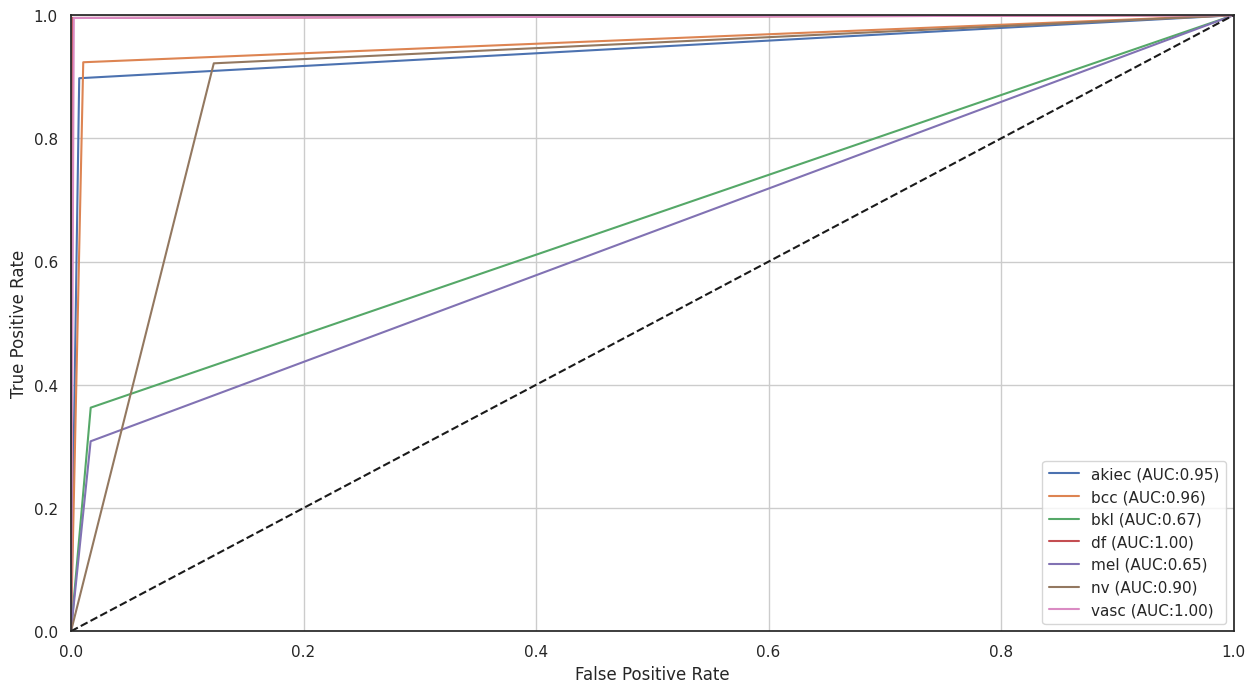

In [34]:

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
ypred = cnn.predict(test_x)
ypred = ypred.argmax(axis=-1)

# set plot figure size
fig, c_ax = plt.subplots( )
fig.set_size_inches(15, 8)
plt.xlim((0,1))
plt.ylim((0,1))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(test_y)
    y_test = lb.transform(test_y)
    y_pred = lb.transform(predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))

    return roc_auc_score(test_y, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(train_y, predictions))
plt.grid()
plt.plot([0, 1], [0, 1], 'k--')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
# visualizer.show()

LIME

1/1 [==============================] - 0s 394ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


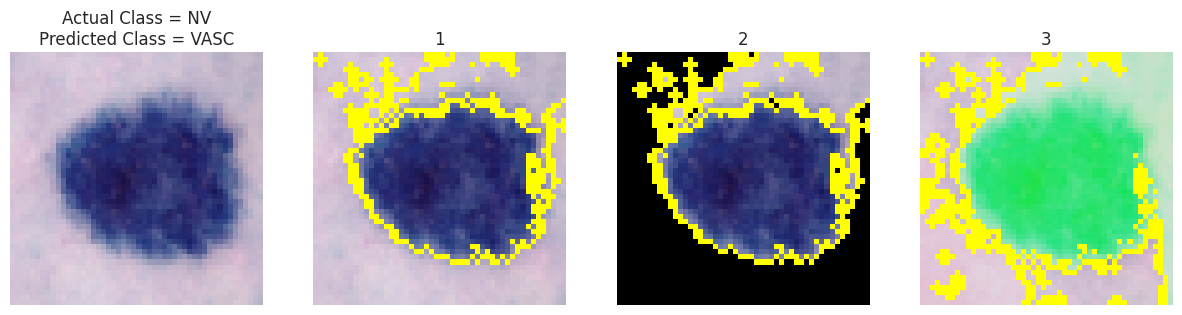

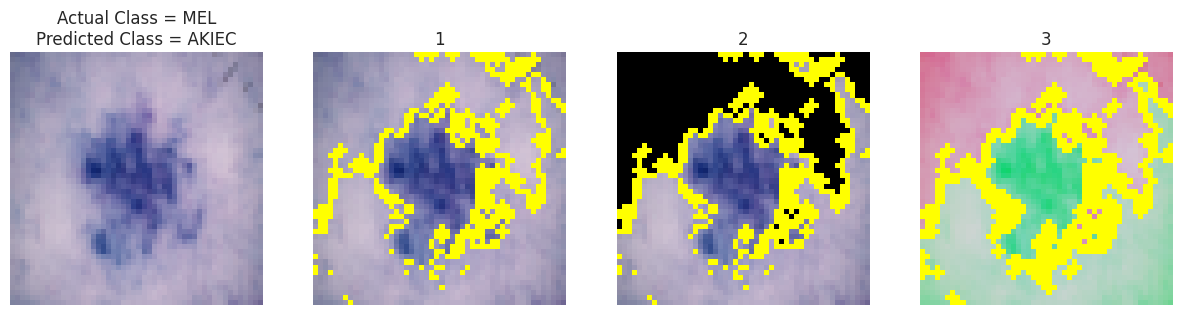

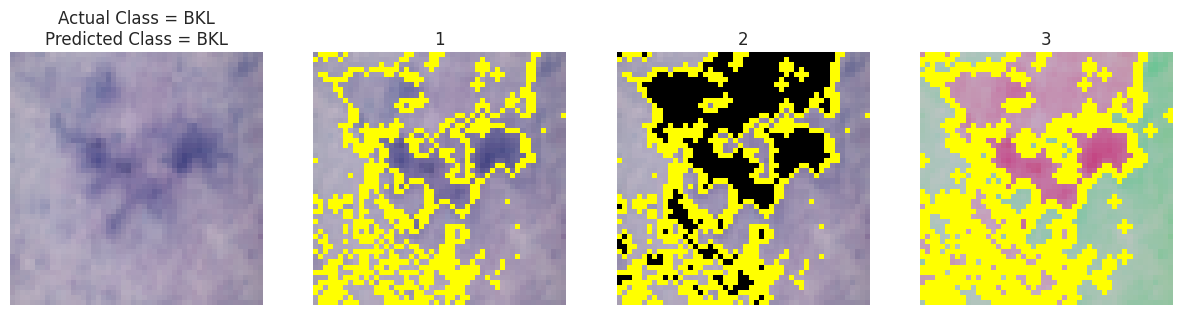

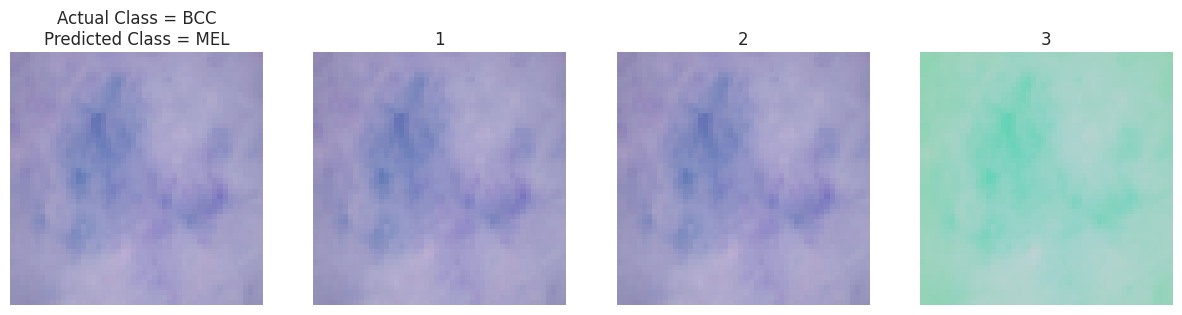

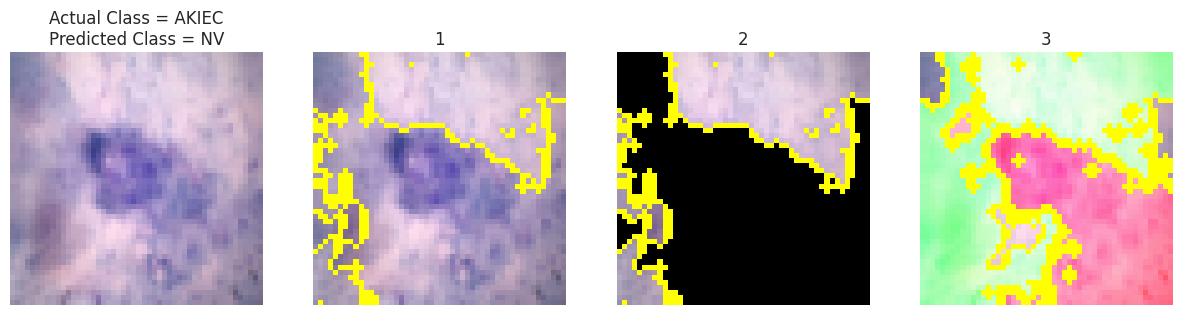

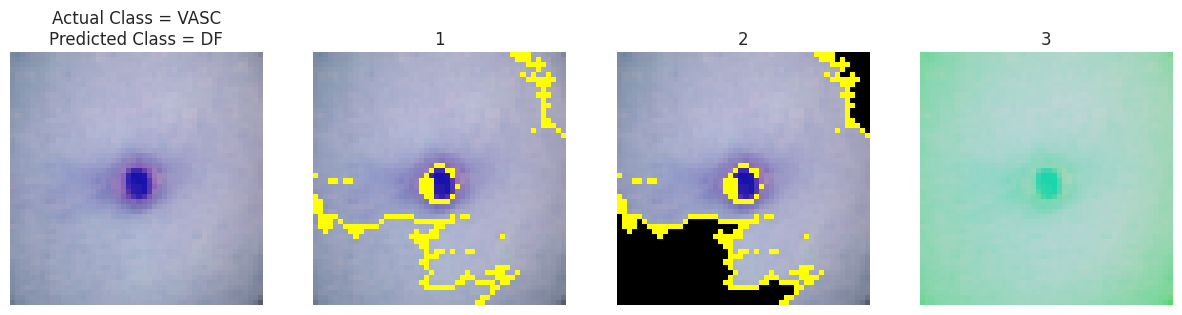

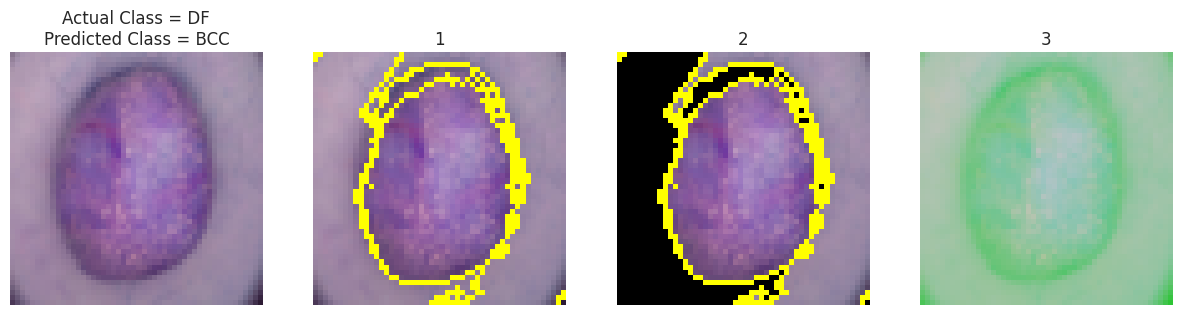

In [35]:
from lime import lime_image
from skimage.segmentation import mark_boundaries


explainer = lime_image.LimeImageExplainer(verbose = False)


n=0

title = ["NV","MEL", "BKL", "BCC", "AKIEC", "VASC", "DF"]

rando_num = random.randint(1,100)
pre =  np.array([np.array(i[rando_num])  for i in [nv_ls,  mel_ls, bkl_ls, bcc_ls, akiec_ls, vasc_ls, df_ls]])
pre = cnn.predict(pre).round(0).argmax(axis=1).tolist()

for ls in [nv_ls,  mel_ls, bkl_ls, bcc_ls, akiec_ls, vasc_ls, df_ls]:
  explanation = explainer.explain_instance(
      np.array(ls[rando_num]).astype('double'),
      classifier_fn = cnn.predict,
      top_labels=100,
      hide_color=0,
      num_samples=1000,
  )

  temp, mask = explanation.get_image_and_mask(
      explanation.top_labels[0],
      positive_only=True,
      num_features=5,
      hide_rest=False
  )
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
  ax1.imshow(np.array(ls[rando_num]))
  ax2.imshow(mark_boundaries(temp / 255, mask))
  temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  ax3.imshow(mark_boundaries(temp1 / 255, mask1))
  temp3, mask3= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
  ax4.imshow(mark_boundaries(temp3 / 255, mask3))
  ax1.set_title("Actual Class = {}\nPredicted Class = {}".format(title[n], title[pre[n]]))
  ax1.axis('off')
  ax2.set_title("1")
  ax2.axis('off')
  ax3.set_title("2")
  ax3.axis('off')
  ax4.set_title("3")
  ax4.axis('off')
  n+=1

1/1 [==============================] - 1s 885ms/step
Actual Class = MEL Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.34s/it]               


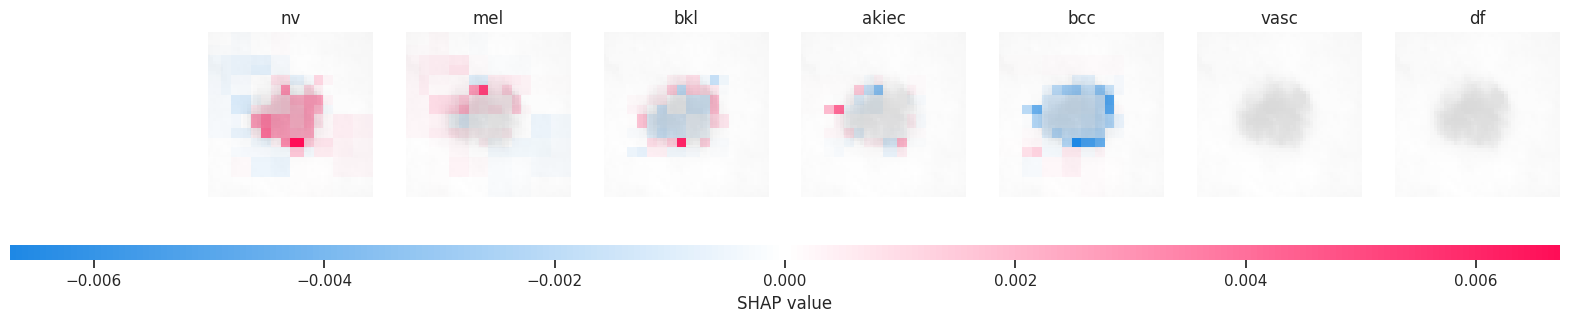

1/1 [==============================] - 0s 19ms/step
Actual Class = BKL Predicted Class = MEL


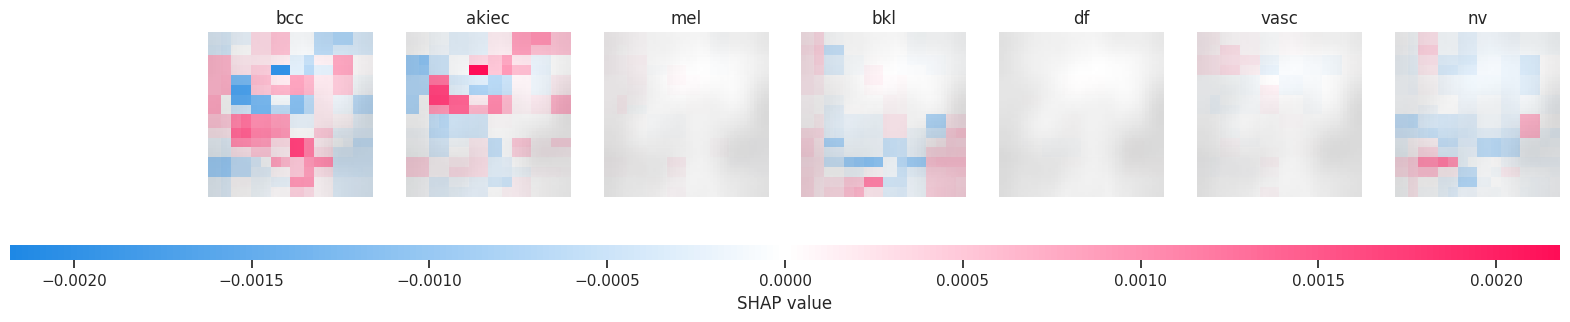

1/1 [==============================] - 0s 32ms/step
Actual Class = NV Predicted Class = VASC


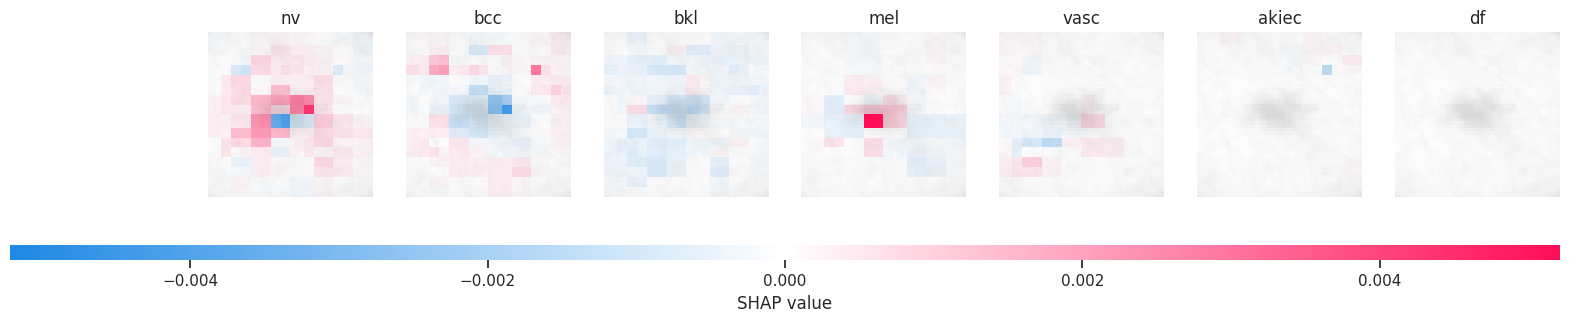

1/1 [==============================] - 0s 35ms/step
Actual Class = VASC Predicted Class = VASC


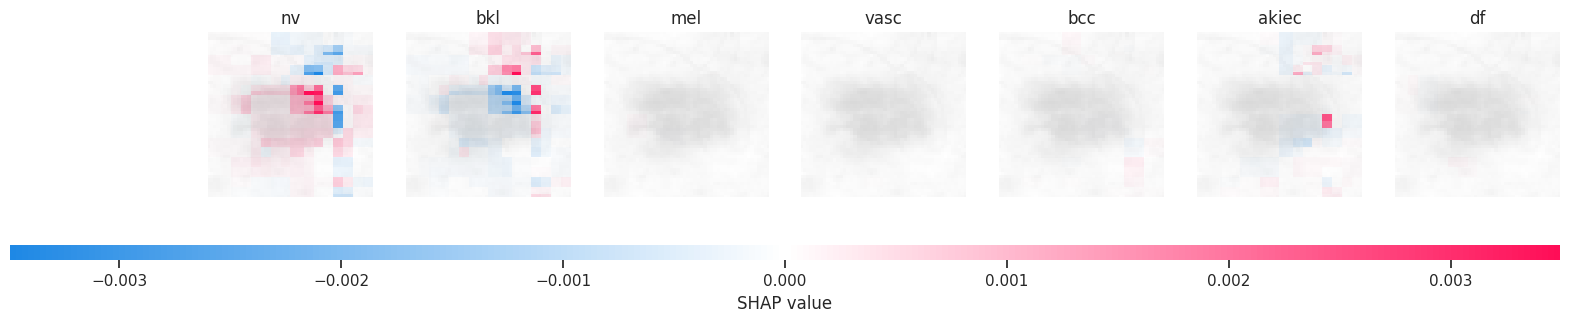

1/1 [==============================] - 0s 19ms/step
Actual Class = MEL Predicted Class = VASC


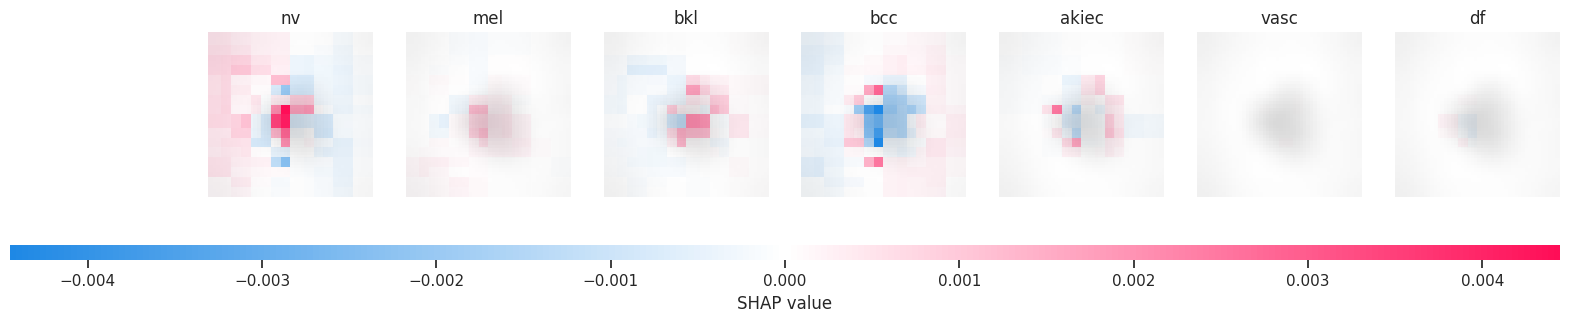

1/1 [==============================] - 0s 19ms/step
Actual Class = VASC Predicted Class = NV


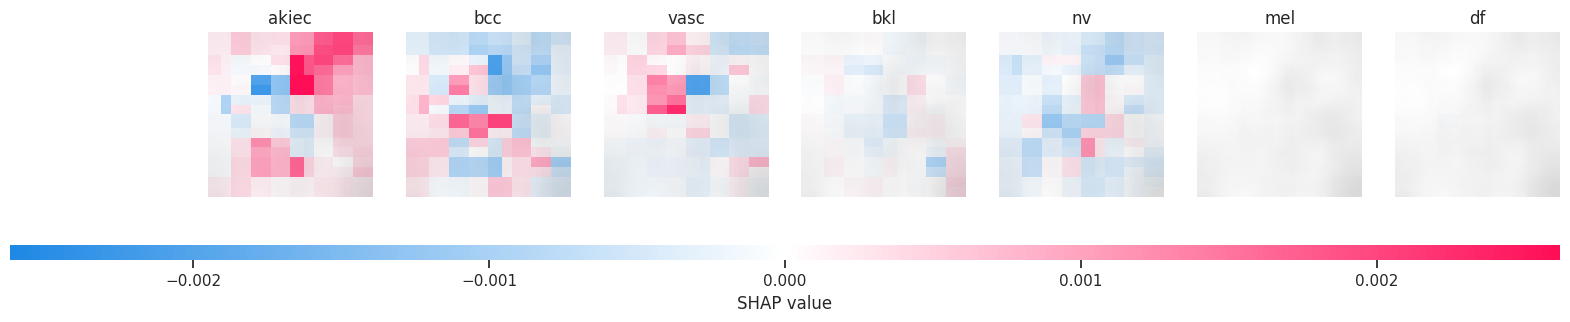

1/1 [==============================] - 0s 19ms/step
Actual Class = AKIEC Predicted Class = BCC


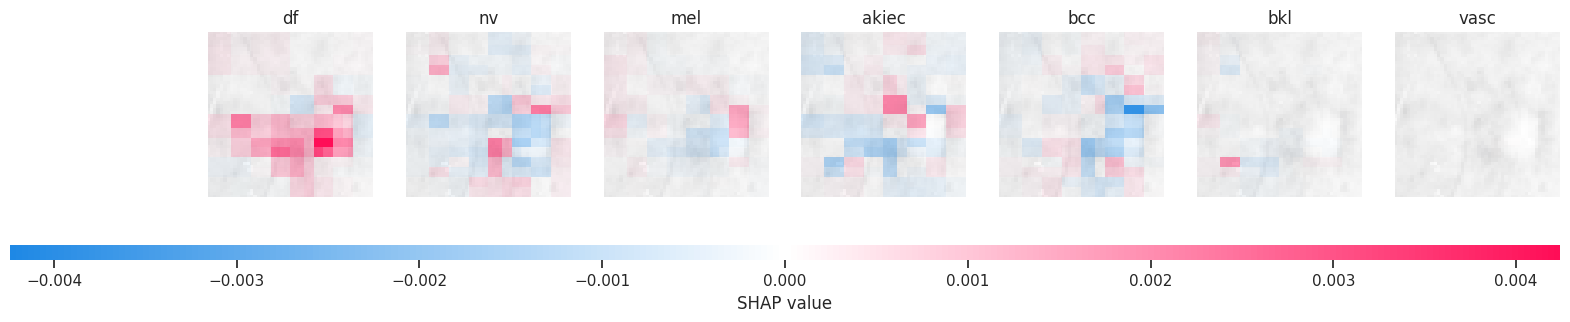

In [36]:
import shap

# load pre-trained model and choose two images to explain
model = cnn

title = ["NV","MEL", "BKL", "BCC", "AKIEC", "VASC", "DF"]

for ls in range(len(title)):

  # define a masker that is used to mask out partitions of the input image, this one uses a blurred background
  masker = shap.maskers.Image("inpaint_telea", (50,50,3))

  # By default the Partition explainer is used for all  partition explainer
  explainer = shap.Explainer(model, masker, output_names=target)
  rando_num = random.randint(1,len(data))
  model_pred = model.predict(data[rando_num-1:rando_num]).argmax(axis=1)[0]
  # print(model_pred)
  # here we use 1000 evaluations of the underlying model to estimate the SHAP values
  print("Actual Class = {} Predicted Class = {}".format(title[labels[rando_num]], title[model_pred]))
  shap_values = explainer(data[rando_num-1:rando_num], max_evals=1000, batch_size=32, outputs=shap.Explanation.argsort.flip[:7])
  shap.image_plot(shap_values)


ResNet50

In [37]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(weights="imagenet",include_top = False,input_shape=(50,50,3))

for layer in resnet.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [38]:
resnet50 = Sequential()
resnet50.add(resnet)
resnet50.add(Flatten())
resnet50.add(Dense(7,activation="softmax"))
resnet50.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:
%%time

checkpoint = ModelCheckpoint("resnet50.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, period=1)

earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

history = resnet50.fit(train_x,train_y,batch_size=32,epochs=100, validation_data=(test_x,test_y), verbose=1)

Epoch 1/100
881/881 [==============================] - 33s 33ms/step - loss: 1.2140 - accuracy: 0.6784 - val_loss: 0.9542 - val_accuracy: 0.7242
Epoch 2/100
881/881 [==============================] - 21s 24ms/step - loss: 0.7944 - accuracy: 0.7726 - val_loss: 0.8162 - val_accuracy: 0.7814
Epoch 3/100
881/881 [==============================] - 25s 28ms/step - loss: 0.6577 - accuracy: 0.8106 - val_loss: 1.0570 - val_accuracy: 0.7774
Epoch 4/100
881/881 [==============================] - 21s 24ms/step - loss: 0.5906 - accuracy: 0.8294 - val_loss: 0.8552 - val_accuracy: 0.7747
Epoch 5/100
881/881 [==============================] - 20s 23ms/step - loss: 0.5448 - accuracy: 0.8428 - val_loss: 0.8694 - val_accuracy: 0.8201
Epoch 6/100
881/881 [==============================] - 20s 23ms/step - loss: 0.4918 - accuracy: 0.8567 - val_loss: 0.9384 - val_accuracy: 0.7945
Epoch 7/100
881/881 [==============================] - 20s 23ms/step - loss: 0.4515 - accuracy: 0.8663 - val_loss: 0.8614 - val_ac

In [40]:
values  = history.history
validation_loss = values['val_loss']
validation_acc = values['val_accuracy']
training_acc = values['accuracy']
training_loss = values['loss']
epochs = range(1, len(training_acc) + 1)

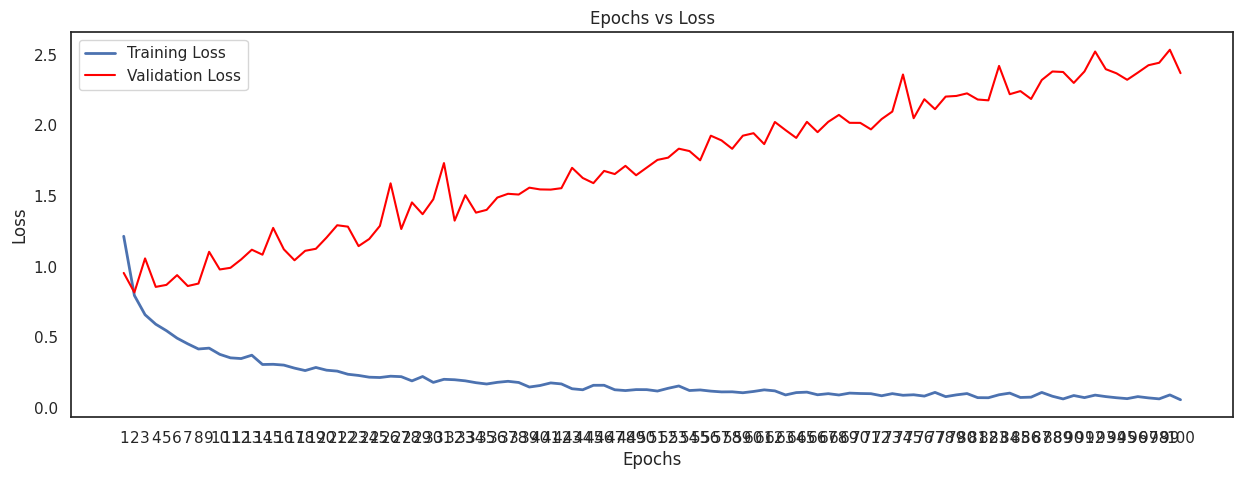

In [41]:
# visualization of overall model performance

plt.figure(1 , figsize = (15 ,5))
plt.plot(epochs,training_loss,label = 'Training Loss', linewidth= 2)
plt.plot(epochs,validation_loss,label = 'Validation Loss', color="red")
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.show()


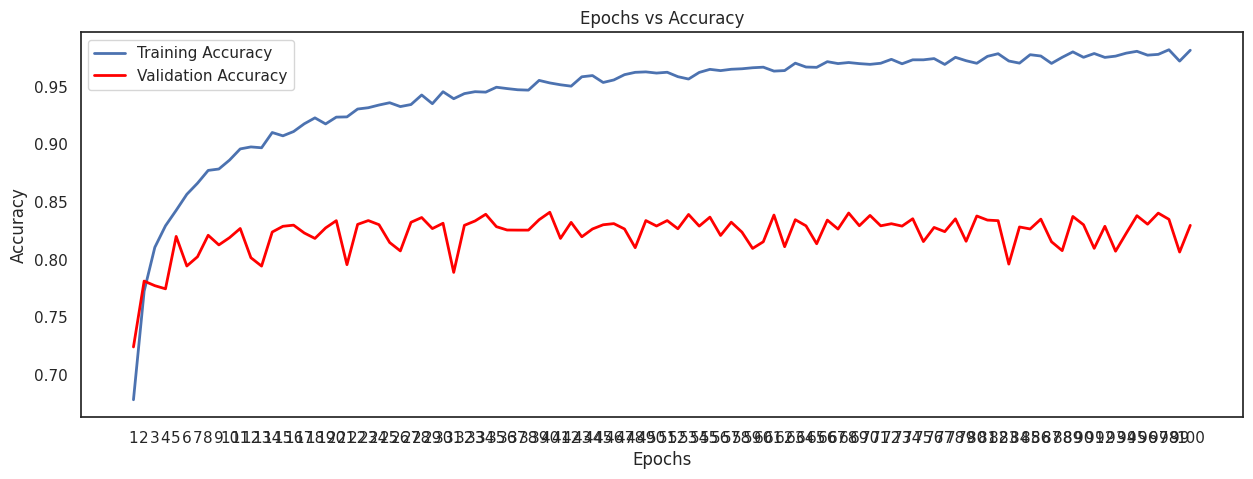

In [42]:
# visualization of overall model performance

plt.figure(1 , figsize = (15 ,5))
plt.plot(epochs,training_acc,label = 'Training Accuracy',linewidth = 2)
plt.plot(epochs,validation_acc,label = 'Validation Accuracy', color="red", linewidth = 2)
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Performance Score and Confusion matrix

In [43]:
predictions= resnet50.predict(test_x).round(0)
loss1, test_acc = resnet50.evaluate(test_x, test_y)
test_acc = test_acc*100

loss2, train_acc = resnet50.evaluate(train_x, train_y)
train_acc = train_acc*100

print('Test Loss score:', loss1)
print('Test accuracy:', test_acc)

print('Train Loss score:', loss2)
print('Train accuracy:', train_acc)

print("Classification Report: \n",classification_report(test_y, predictions, target_names=target))
print()
print("Confusion Matrix:")
cm = confusion_matrix(np.argmax(test_y, axis=1), np.argmax(predictions, axis=1))
cm =pd.DataFrame(cm, index=target, columns=target)
cm

881/881 [==============================] - 13s 15ms/step - loss: 0.0224 - accuracy: 0.9922
Test Loss score: 2.3701119422912598
Test accuracy: 82.97449350357056
Train Loss score: 0.022436026483774185
Train accuracy: 99.21916723251343
Classification Report: 
               precision    recall  f1-score   support

       akiec       0.85      0.93      0.89       900
         bcc       0.90      0.94      0.92      1350
         bkl       0.47      0.44      0.46       989
          df       0.95      1.00      0.97       900
         mel       0.45      0.39      0.42      1002
          nv       0.88      0.88      0.88      6035
        vasc       0.97      1.00      0.98       900

   micro avg       0.83      0.83      0.83     12076
   macro avg       0.78      0.80      0.79     12076
weighted avg       0.82      0.83      0.83     12076
 samples avg       0.83      0.83      0.83     12076


Confusion Matrix:


,akiec,bcc,bkl,df,mel,nv,vasc
akiec,842,16,17,1,7,17,0
bcc,14,1266,21,2,9,30,8
bkl,53,54,435,16,143,284,4
df,0,0,0,897,0,3,0
mel,41,23,153,12,392,375,6
nv,63,48,292,18,317,5286,11
vasc,0,0,0,0,0,3,897


378/378 [==============================] - 5s 12ms/step
ROC AUC score: 0.8810837466523854


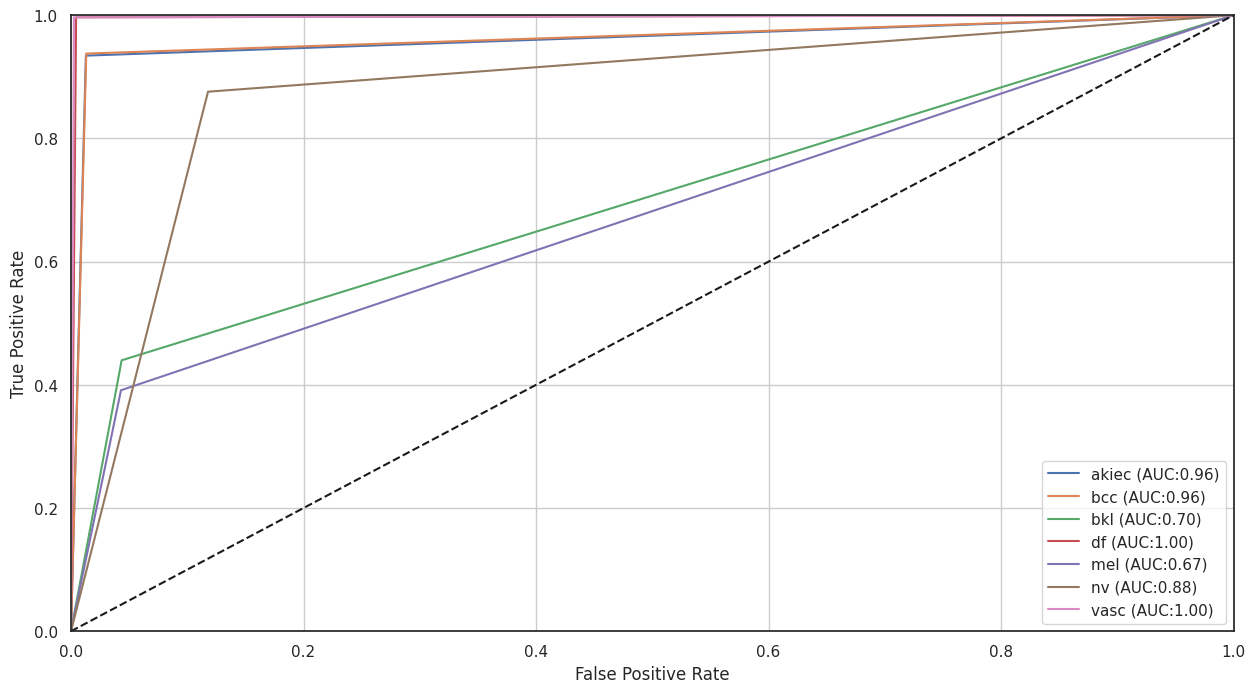

In [44]:
ypred = resnet50.predict(test_x)
ypred = ypred.argmax(axis=-1)

# set plot figure size
fig, c_ax = plt.subplots( )
fig.set_size_inches(15, 8)
plt.xlim((0,1))
plt.ylim((0,1))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(test_y)
    y_test = lb.transform(test_y)
    y_pred = lb.transform(predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))

    return roc_auc_score(test_y, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(train_y, predictions))
plt.grid()
plt.plot([0, 1], [0, 1], 'k--')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
# visualizer.show()

LIME

1/1 [==============================] - 2s 2s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


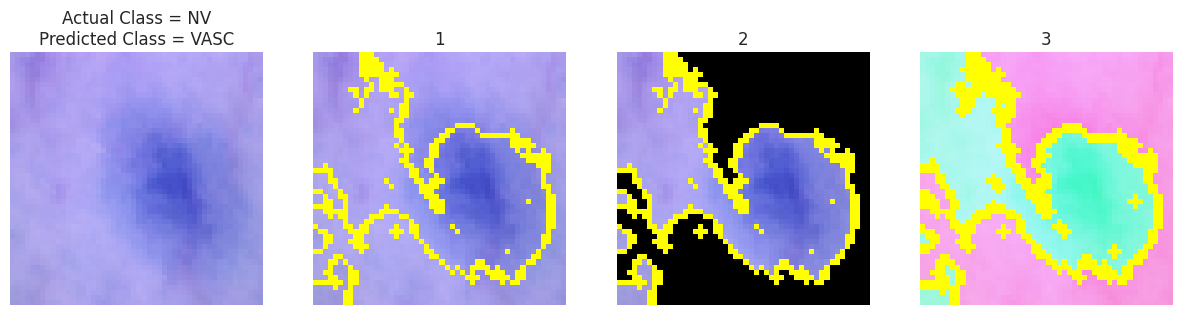

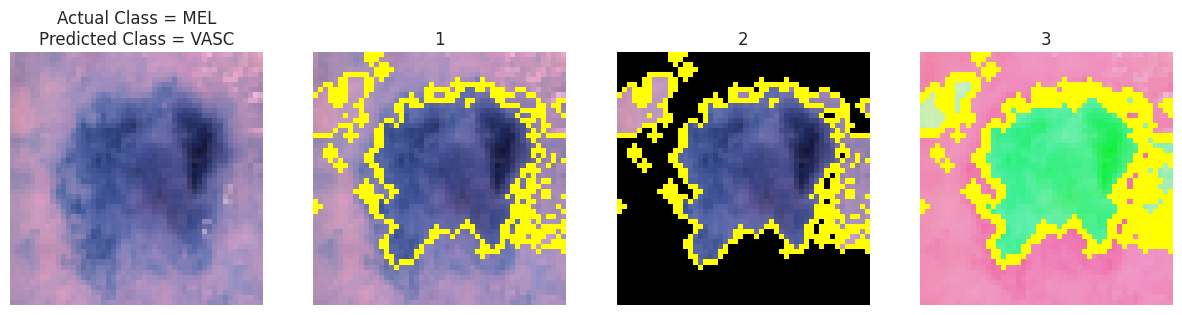

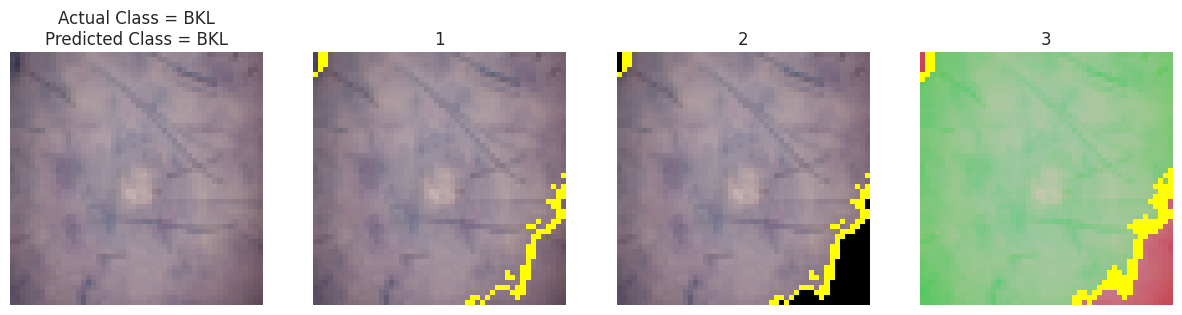

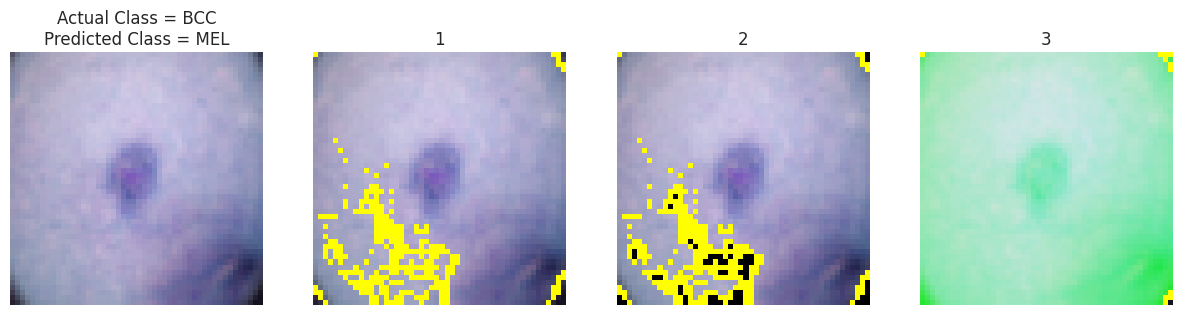

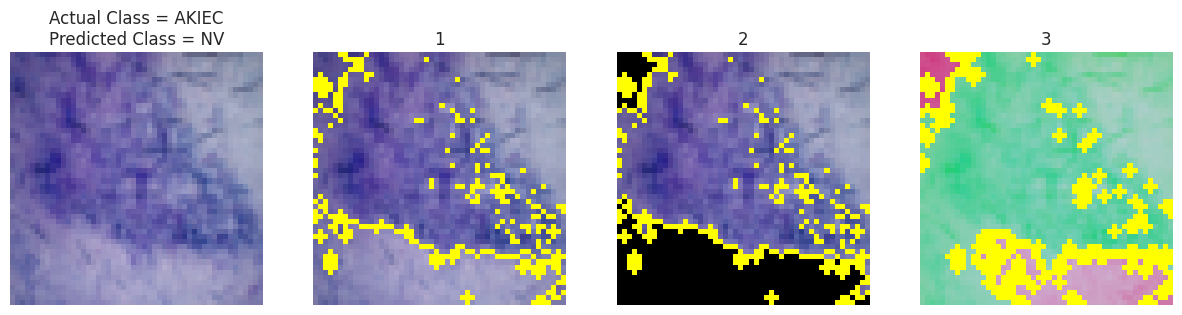

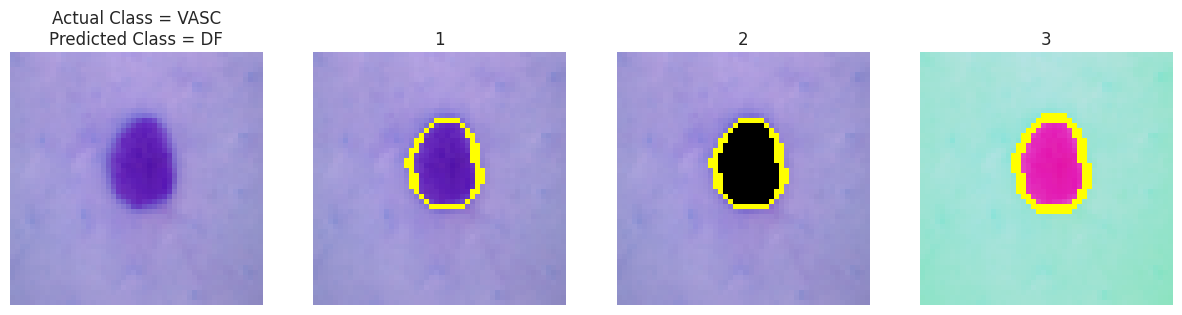

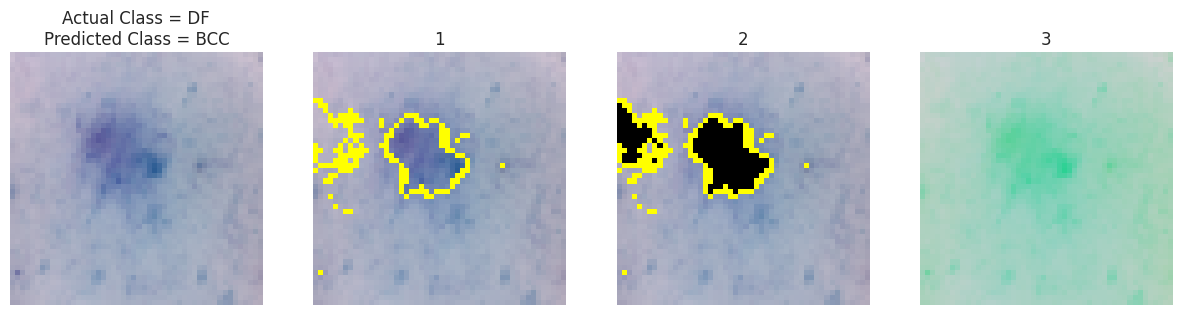

In [45]:
explainer = lime_image.LimeImageExplainer(verbose = False)


n=0

title = ["NV","MEL", "BKL", "BCC", "AKIEC", "VASC", "DF"]

rando_num = random.randint(1,100)

pre =  np.array([np.array(i[rando_num])  for i in [nv_ls,  mel_ls, bkl_ls, bcc_ls, akiec_ls, vasc_ls, df_ls]])
pre = resnet50.predict(pre).round(0).argmax(axis=1).tolist()

for ls in [nv_ls,  mel_ls, bkl_ls, bcc_ls, akiec_ls, vasc_ls, df_ls]:
  explanation = explainer.explain_instance(
      np.array(ls[rando_num]).astype('double'),
      classifier_fn = resnet50.predict,
      top_labels=100,
      hide_color=0,
      num_samples=1000,
  )

  temp, mask = explanation.get_image_and_mask(
      explanation.top_labels[0],
      positive_only=True,
      num_features=5,
      hide_rest=False
  )
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
  ax1.imshow(np.array(ls[rando_num]))
  ax2.imshow(mark_boundaries(temp / 255, mask))
  temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  ax3.imshow(mark_boundaries(temp1 / 255, mask1))
  temp3, mask3= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
  ax4.imshow(mark_boundaries(temp3 / 255, mask3))
  ax1.set_title("Actual Class = {}\nPredicted Class = {}".format(title[n], title[pre[n]]))
  ax1.axis('off')
  ax2.set_title("1")
  ax2.axis('off')
  ax3.set_title("2")
  ax3.axis('off')
  ax4.set_title("3")
  ax4.axis('off')
  n+=1

SHAP

1/1 [==============================] - 1s 657ms/step
Actual Class = BCC Predicted Class = DF


  0%|          | 0/998 [00:00<?, ?it/s]

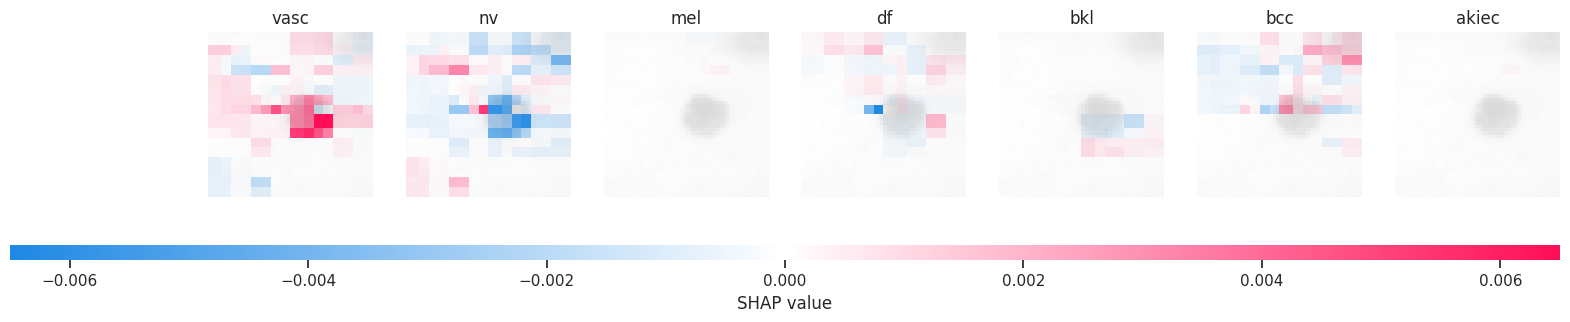

1/1 [==============================] - 0s 45ms/step
Actual Class = VASC Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

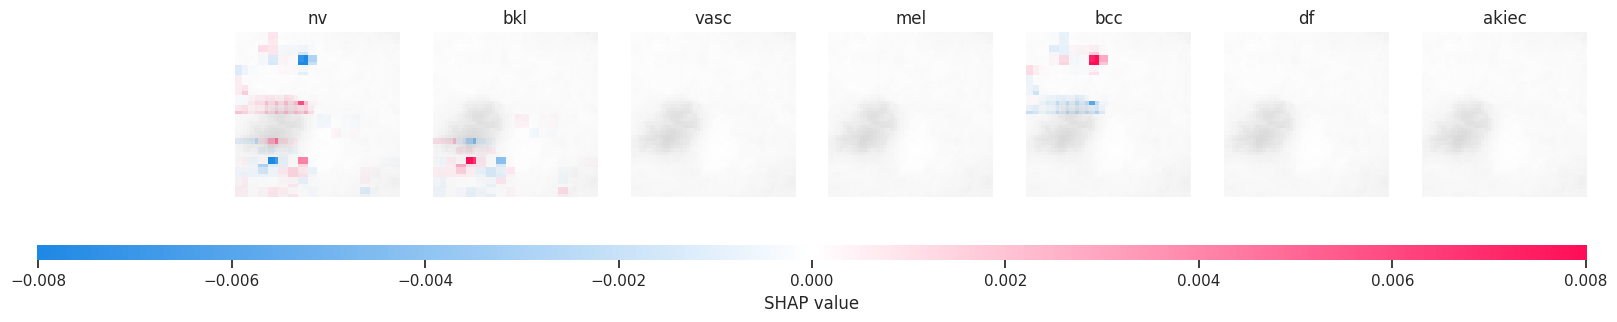

1/1 [==============================] - 0s 22ms/step
Actual Class = NV Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

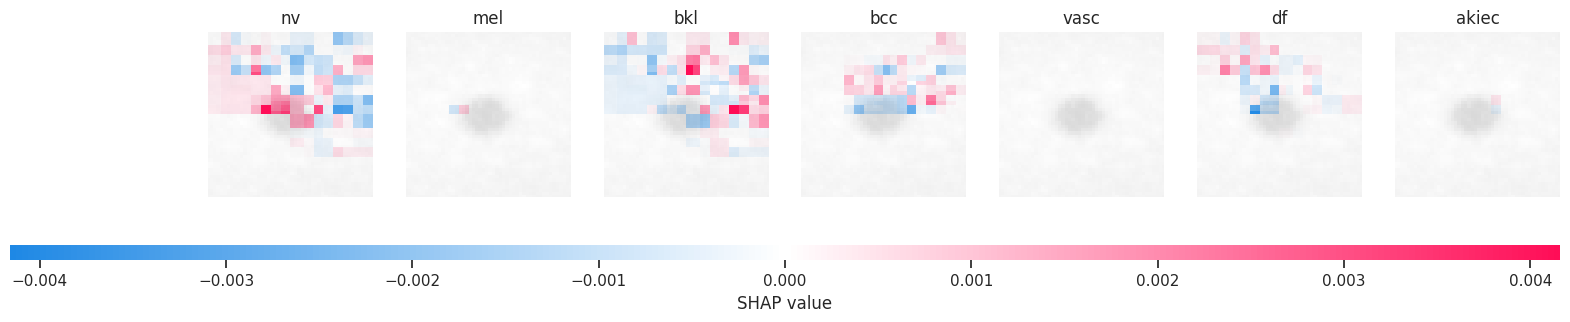

1/1 [==============================] - 0s 33ms/step
Actual Class = VASC Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

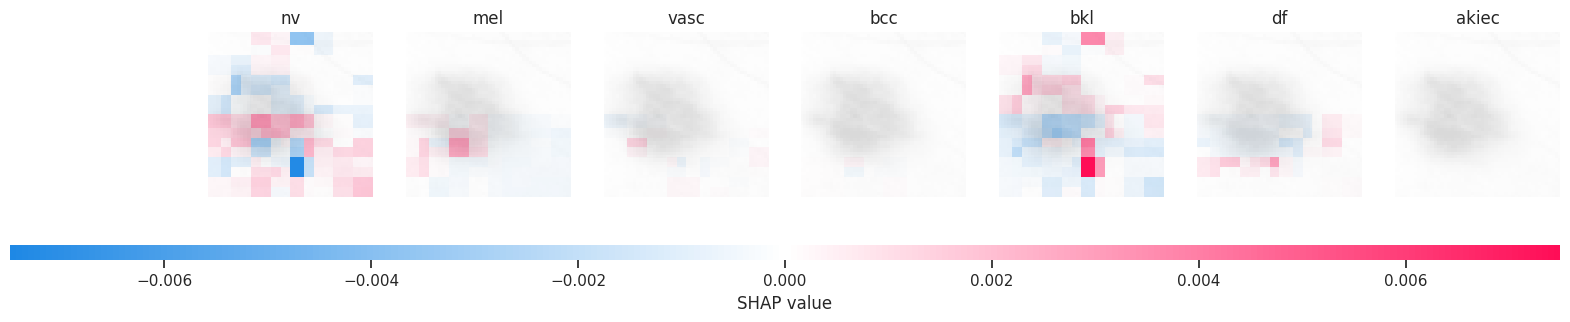

1/1 [==============================] - 0s 22ms/step
Actual Class = BCC Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

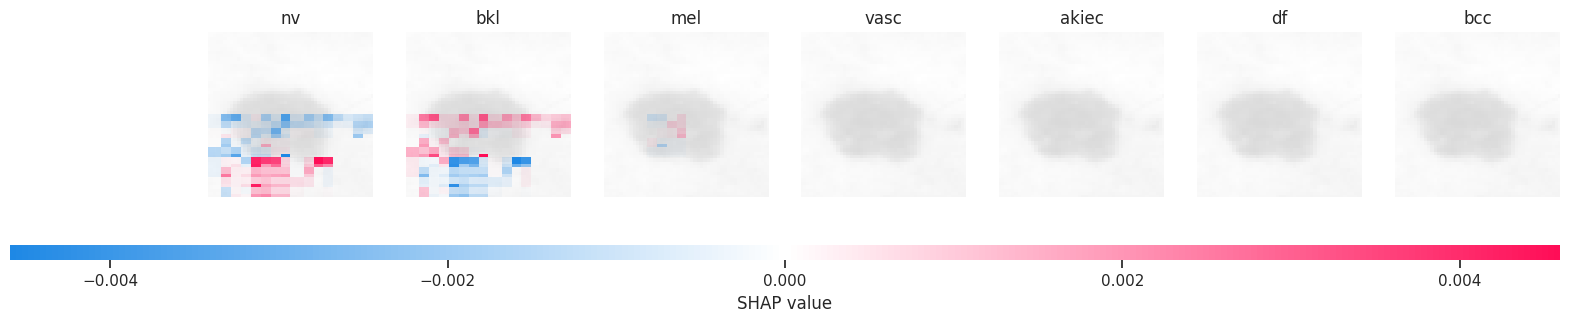

1/1 [==============================] - 0s 25ms/step
Actual Class = MEL Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

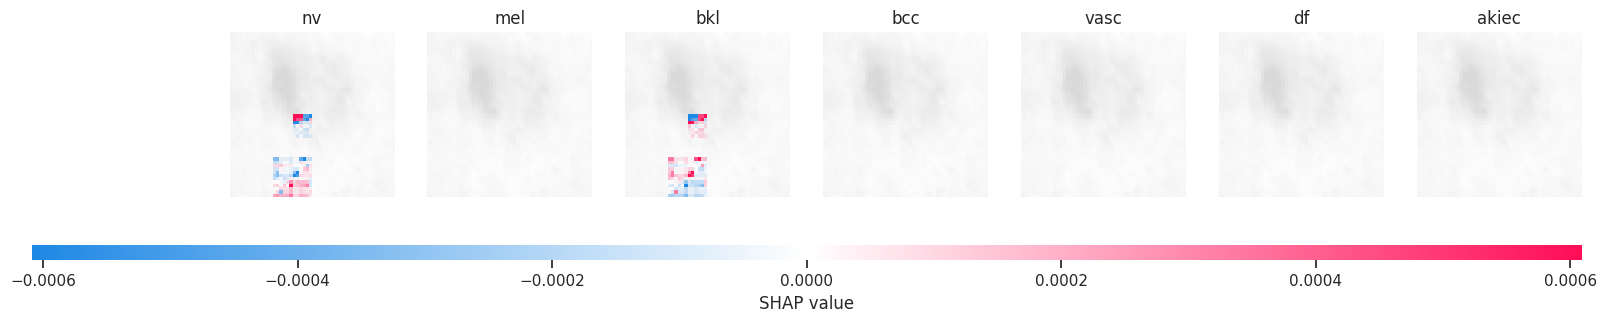

1/1 [==============================] - 0s 48ms/step
Actual Class = BCC Predicted Class = VASC


  0%|          | 0/998 [00:00<?, ?it/s]

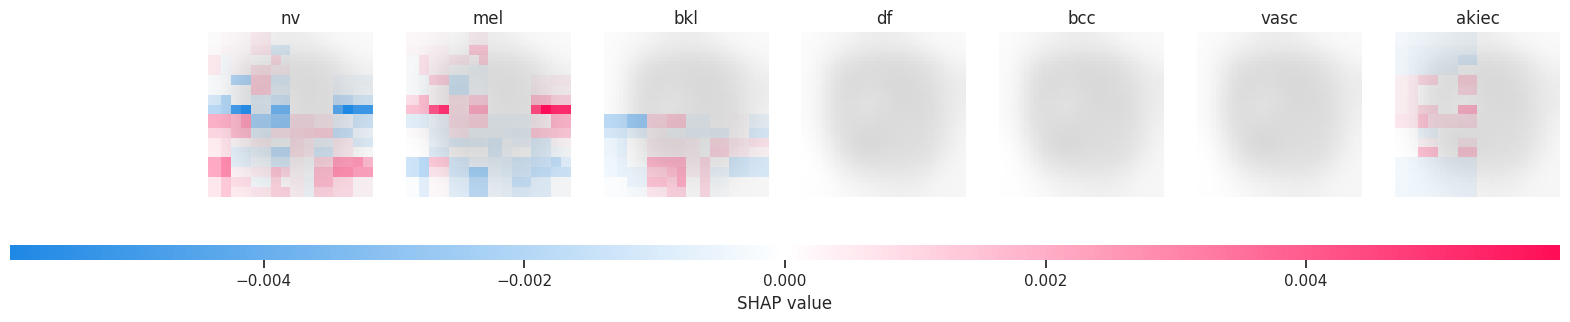

In [46]:
model = resnet50

title = ["NV","MEL", "BKL", "BCC", "AKIEC", "VASC", "DF"]

for ls in range(len(title)):

  # define a masker that is used to mask out partitions of the input image, this one uses a blurred background
  masker = shap.maskers.Image("inpaint_telea", (50,50,3))

  # By default the Partition explainer is used for all  partition explainer
  explainer = shap.Explainer(model, masker, output_names=target)
  rando_num = random.randint(1,len(data))
  model_pred = model.predict(data[rando_num-1:rando_num]).argmax(axis=1)[0]
  # print(model_pred)
  # here we use 500 evaluations of the underlying model to estimate the SHAP values
  print("Actual Class = {} Predicted Class = {}".format(title[labels[rando_num]], title[model_pred]))
  shap_values = explainer(data[rando_num-1:rando_num], max_evals=1000, batch_size=32, outputs=shap.Explanation.argsort.flip[:7])
  shap.image_plot(shap_values)


VGGNet

In [51]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten


In [52]:
# Initialize the VGG16 model with pre-trained ImageNet weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze all layers in the VGG16 model
for layer in vgg16_base.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [53]:
# Create a new model on top of the pre-trained base model
vgg16_model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(7, activation='softmax')
])

In [54]:
# Compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("vgg16_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, period=1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)

In [56]:
# Train the model
history_vgg16 = vgg16_model.fit(train_x, train_y, batch_size=32, epochs=100,
                                validation_data=(test_x, test_y), verbose=1)
                                # callbacks=[checkpoint, earlystop])


Epoch 1/100
881/881 [==============================] - 19s 21ms/step - loss: 0.9921 - accuracy: 0.6762 - val_loss: 1.0742 - val_accuracy: 0.6576
Epoch 2/100
881/881 [==============================] - 17s 20ms/step - loss: 0.9992 - accuracy: 0.6729 - val_loss: 1.0716 - val_accuracy: 0.6645
Epoch 3/100
881/881 [==============================] - 17s 20ms/step - loss: 0.9900 - accuracy: 0.6773 - val_loss: 1.1159 - val_accuracy: 0.6437
Epoch 4/100
881/881 [==============================] - 17s 20ms/step - loss: 0.9929 - accuracy: 0.6739 - val_loss: 1.0258 - val_accuracy: 0.6718
Epoch 5/100
881/881 [==============================] - 17s 19ms/step - loss: 0.9812 - accuracy: 0.6793 - val_loss: 1.1167 - val_accuracy: 0.6457
Epoch 6/100
881/881 [==============================] - 17s 20ms/step - loss: 0.9821 - accuracy: 0.6761 - val_loss: 1.0371 - val_accuracy: 0.6790
Epoch 7/100
881/881 [==============================] - 17s 20ms/step - loss: 0.9924 - accuracy: 0.6787 - val_loss: 1.0654 - val_ac

In [57]:
# Extract values from history
values_vgg16 = history_vgg16.history
validation_loss_vgg16 = values_vgg16['val_loss']
validation_acc_vgg16 = values_vgg16['val_accuracy']
training_acc_vgg16 = values_vgg16['accuracy']
training_loss_vgg16 = values_vgg16['loss']
epochs_vgg16 = range(1, len(training_acc_vgg16) + 1)

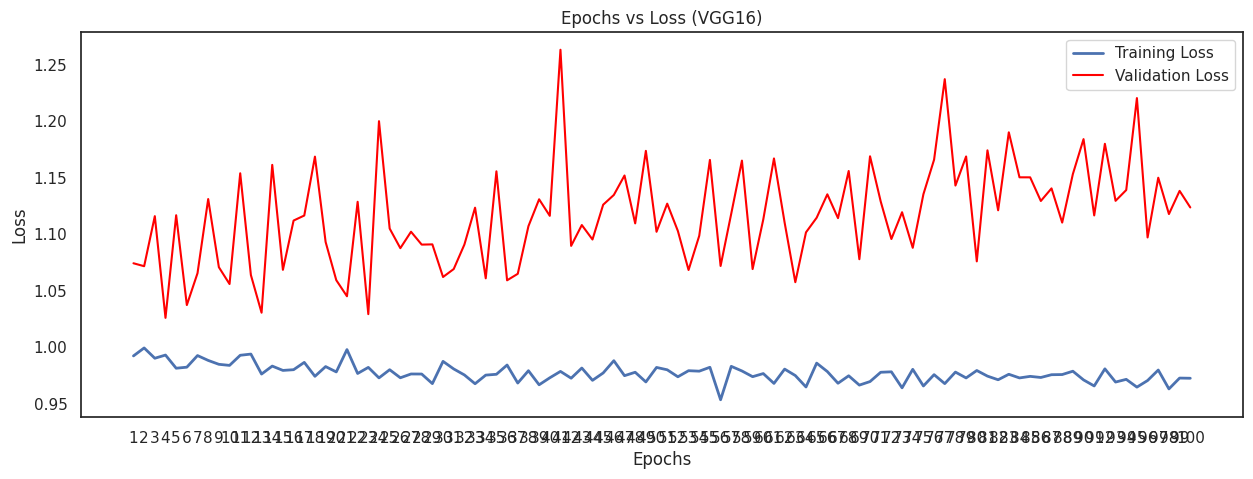

In [58]:
# Visualize overall model performance (Loss)
plt.figure(figsize=(15, 5))
plt.plot(epochs_vgg16, training_loss_vgg16, label='Training Loss', linewidth=2)
plt.plot(epochs_vgg16, validation_loss_vgg16, label='Validation Loss', color="red")
plt.title('Epochs vs Loss (VGG16)')
plt.xlabel('Epochs')
plt.xticks(epochs_vgg16)
plt.ylabel('Loss')
plt.legend()
plt.show()

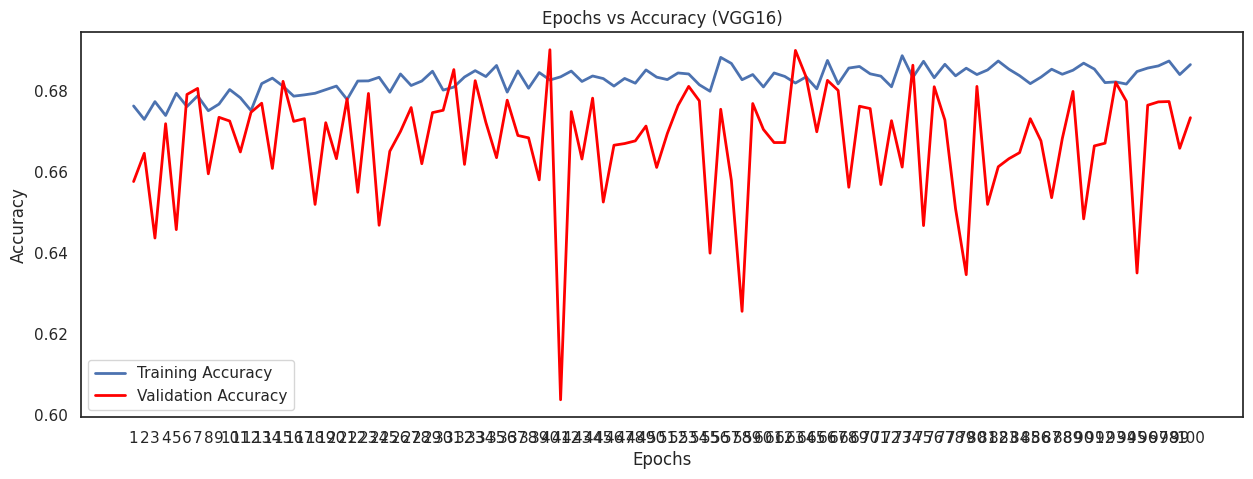

In [59]:
# Visualize overall model performance (Accuracy)
plt.figure(figsize=(15, 5))
plt.plot(epochs_vgg16, training_acc_vgg16, label='Training Accuracy', linewidth=2)
plt.plot(epochs_vgg16, validation_acc_vgg16, label='Validation Accuracy', color="red", linewidth=2)
plt.title('Epochs vs Accuracy (VGG16)')
plt.xlabel('Epochs')
plt.xticks(epochs_vgg16)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:

# Evaluate the model
loss_vgg16, test_acc_vgg16 = vgg16_model.evaluate(test_x, test_y)
test_acc_vgg16 = test_acc_vgg16 * 100
print('Test Loss score (VGG16):', loss_vgg16)
print('Test Accuracy (VGG16):', test_acc_vgg16)

378/378 [==============================] - 5s 14ms/step - loss: 1.1236 - accuracy: 0.6733
Test Loss score (VGG16): 1.1236064434051514
Test Accuracy (VGG16): 67.33189821243286


In [61]:

# Print classification report and confusion matrix
predictions_vgg16 = vgg16_model.predict(test_x).round(0)
print("Classification Report (VGG16): \n", classification_report(test_y, predictions_vgg16, target_names=target))
print("Confusion Matrix (VGG16):")
cm_vgg16 = confusion_matrix(np.argmax(test_y, axis=1), np.argmax(predictions_vgg16, axis=1))
print(pd.DataFrame(cm_vgg16, index=target, columns=target))

378/378 [==============================] - 5s 12ms/step
Classification Report (VGG16): 
               precision    recall  f1-score   support

       akiec       0.53      0.53      0.53       900
         bcc       0.64      0.44      0.52      1350
         bkl       0.32      0.19      0.24       989
          df       0.77      0.43      0.55       900
         mel       0.47      0.11      0.17      1002
          nv       0.78      0.86      0.82      6035
        vasc       0.87      0.83      0.85       900

   micro avg       0.72      0.64      0.68     12076
   macro avg       0.62      0.48      0.53     12076
weighted avg       0.69      0.64      0.65     12076
 samples avg       0.64      0.64      0.64     12076

Confusion Matrix (VGG16):
       akiec  bcc  bkl   df  mel    nv  vasc
akiec    666   57   46    4    9   117     1
bcc      475  591   48   20    8   199     9
bkl      310   53  192   21   36   356    21
df       238   68   10  385    0   199     0
mel      

DenseNet coding is in the densenet(SKD).ipynb file